# Module load

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

# Data load

In [2]:
def load_data(path):
    data_nc = xr.open_dataset(path)
    # save all the variables in data_nc file as a list.
    var_list = list(data_nc.data_vars.keys())
    
    #if the index of a variable of interest is not 1, 
    #you could edit the index number from 1 to other number in the very below line.
    var = var_list[1]
    data = data_nc.data_vars[var]
    print("completely load data with variable \"{0}\"".format(var))
    return data

In [3]:
path = 'sst.mnmean.nc'
data = load_data(path)

completely load data with variable "sst"


# Transform longitude and latitude
Transform longitude into -180 ~ 180.  
Sort longitude and latitude in ascending order

In [4]:
def sort_latlon(data):
    data_ = data.assign_coords({"lon" : (((data.lon + 180) % 360) - 180)})
    data_ = data_.sortby('lon')
    data_ = data_.sortby('lat')
    return data_

In [5]:
# transform longitude
data = sort_latlon(data)
data

<xarray.DataArray 'sst' (time: 2017, lat: 89, lon: 180)>
[32312340 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 -180.0 -178.0 -176.0 -174.0 ... 174.0 176.0 178.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

# Calculate climatology of each month

Do you know what 'climatology' is? (평년값)

Climatological averages, which are the mean of monthly values of a climate variable over a specified period of time.  
The period will vary depending on the availability of data, but is typically in the range of 2-20 years.  

Climatological normals are monthly averages computed for a prolonged period of at least 30 consecutive years.  
The current default climatological standard normal is the average of the period from 01 January 1981 to 31 December 2010.  

from : https://cds.climate.copernicus.eu/toolbox/doc/how-to/13_how_to_calculate_climatologies_and_anomalies/13_how_to_calculate_climatologies_and_anomalies.html#calculating-climatologies

Please check that the dtype of dimension 'month' is **int** type in clim. 

**It is not datetime64**

In [6]:
# Select climatology period, '1981-2010' , group data by month, and mean respect to each month.
# Therefore, we can get 30-yr average value of each month.
clim = data.sel(time=slice('1981','2010')).groupby('time.month').mean(dim='time')
clim

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995],
        [-1.7999995, -1.7999995, -1.7999995, ..., -1.7999995,
         -1.7999995, -1.7999995]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 -180.0 -178.0 -176.0 -174.0 ... 174.0 176.0 178.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Plot sst monthly climatology

## January
Let's start with simple one.

In [7]:
def plot_sst(data, ax):
    
    
    m = Basemap(resolution='c',llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90,
                ax=ax)
    m.drawcoastlines(linewidth=0.5)
    #m.drawparallels(np.arange(-90,90+30,30), labels=[1,0,0,0],fontsize=13, linewidth = 1, color='gray')
    #m.drawmeridians(np.arange(-180,180,60),labels = [0,0,0,1], fontsize=13, linewidth = 1, color='gray')
    
    
    lon, lat = np.meshgrid(data.lon, data.lat)
    temp_contour = m.contour(lon,lat, data, cmap = plt.cm.Spectral_r, levels = np.round(np.linspace(-4, 32,10),0))
    plt.clabel(temp_contour, inline=True, fontsize=10)
    return temp_contour

Text(0.5, 0.98, 'January SST climatology 1981-2010')

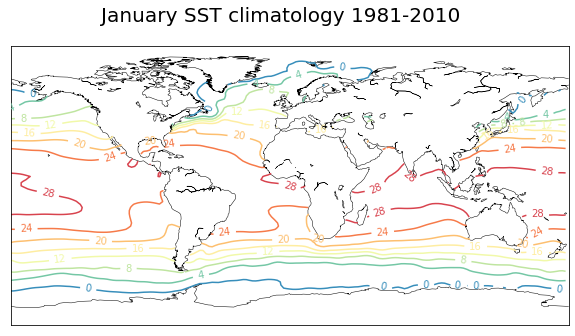

In [8]:
nrow = 1
ncol = 1
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(10,5.2))

jan =  clim.sel(month=1)
plot_sst(jan,ax)

fig.suptitle('January SST climatology 1981-2010', fontsize=20)

## January ~ December 
Let's draw 12-month in one figure.  
This figure is not highly suitable for climate analysis, however, let's plot this figure for practicing.

In [9]:
def plot_sst(data, ax, month=str):
    
    
    m = Basemap(resolution='c',llcrnrlon=-180, llcrnrlat=-90, urcrnrlon=180, urcrnrlat=90,
                ax=ax)
    m.drawcoastlines(linewidth=0.5)
    
    ax.set_title("{}".format(month), fontsize=16)
    
    lon, lat = np.meshgrid(data.lon, data.lat)
    temp_contour = m.contour(lon,lat, data, cmap = plt.cm.Spectral_r, levels = np.round(np.linspace(-4, 32,10),0))
    plt.clabel(temp_contour, inline=True, fontsize=10)
    
    return temp_contour

Text(0.5, 0.98, 'SST monthly climatology 1981-2010')

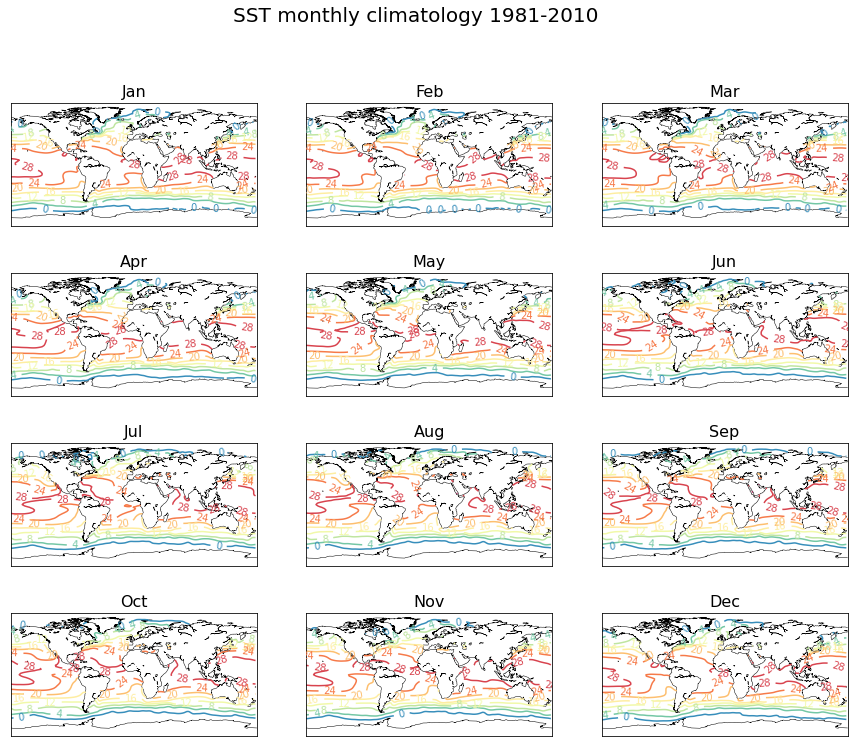

In [10]:
nrow = 4
ncol = 3
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,12))


for row in range(0,nrow):
    for col in range(0,ncol):
        month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
        
        #count numer 0 ~ 11
        month_order = int(row*3+col)
        
        each_month =  clim.sel(month=month_order+1)
        plot_sst(each_month,ax[row][col],month[month_order])

fig.suptitle('SST monthly climatology 1981-2010', fontsize=20)
        
#cbar_ax = fig.add_axes([0.17, 0.07, 0.685, 0.025])        
#cmap = mpl.cm.Spectral_r
#norm = mpl.colors.Normalize(vmin=0., vmax=0.64)
#cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=cbar_ax, orientation='horizontal')

# Plot seasonal climatology

In [11]:
def mon_mon(month, start = int, end = int):
    # month should be a form of  data['time.month']
    # input start month and end month with int type
    # ex - if you need MAM season, you can input "start = 3, end = 5"
    print("return data for {0} ~ {1} th month".format(start, end))
    return (month >= start) & (month <= end)

In [12]:
sst_season = []

for i in range(3,12+3,3):
    
    if i == 12:
        jan_feb = clim[mon_mon(clim['month'],start=1, end=2)]
        dec = clim[clim['month'] == 12]
        djf = xr.concat([jan_feb, dec],dim='month')
        sst_season.append(djf)
        
    else:
        sst_season.append(clim[mon_mon(clim['month'],start = i, end = i+2)])
        
    print(i)

return data for 3 ~ 5 th month
3
return data for 6 ~ 8 th month
6
return data for 9 ~ 11 th month
9
return data for 1 ~ 2 th month
12


Text(0.5, 0.98, 'SST seasonal climatology 1981-2010')

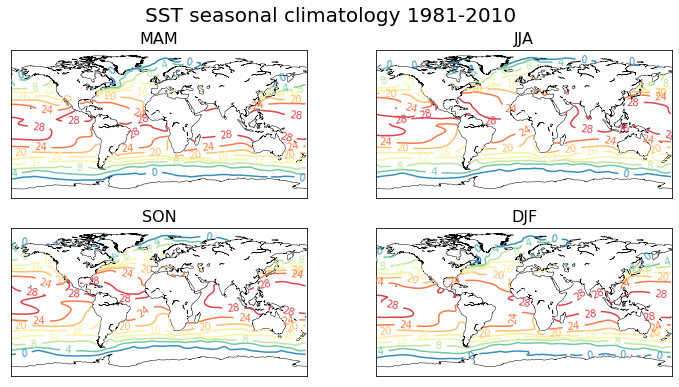

In [13]:
nrow = 2
ncol = 2
fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(12,6))


for row in range(0,nrow):
    for col in range(0,ncol):
        season = ['MAM','JJA','SON','DJF']
        
        #count numer 0 ~ 3 
        order = int(row*2+col)
        
        season_data =  sst_season[order].mean(dim='month')
        plot_sst(season_data,ax[row][col],season[order])

fig.suptitle('SST seasonal climatology 1981-2010', fontsize=20)
        
#cbar_ax = fig.add_axes([0.17, 0.07, 0.685, 0.025])        
#cmap = mpl.cm.Spectral_r
#norm = mpl.colors.Normalize(vmin=0., vmax=0.64)
#cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap), cax=cbar_ax, orientation='horizontal')